# Geodatenanalyse 1

## Tag 1 / Block 2 / Übung 9: Fortgeschrittene Sensitivitätsanalyse


Für fortgeschrittene Sensitivitätsanalysen gibt es in Python das Package `SALib` (https://salib.readthedocs.io/en/latest/index.html), in dem viele gängige Methoden (z.B. Morris Method, Sobol Indices) und die benötigten Sampling-Strategien implementiert sind. 

### 1. Morris Method

Die Morris Method in SALib ist unterteilt in zwei Algorithmen: `SALib.analyze.morris.sample()` zum Generieren von Modell-Inputs nach der Factorial Sammpling Strategie, und `SALib.analyze.morris.analyze()`, mit der die Elemenatry Effects der Modell-Inputs und Outputs analysiert werden können. 

`SALib.analyze.morris.sample()` benötigt als Input-Argument ein Python Dictionary mit der folgenden Angaben: 

'{'num_vars': Anzahl_unsichere_Parameter, 'names': [Name1, Name2, ...], 'bounds':[[min1, max1], [min2, max2], ...]}'

Daneben müssen als weitere Inputs noch die Anzahl der Pfade (Trajectories), sowie die Anzahl der Gridpunkte "num_levels=..." für das Factorial Sampling angegeben werden.

Definiert nun zuerst ein Python Dictionary mit den entsprechenden Angaben zu dem analytischen Abbaumodell aus den letzten Übungen, und erzeugt Euch dann mit `morris.sample()` einen Inputdatensatz mit einen Factorial Sammpling. 

Inspiziert anschließend den generierten Inputdatensatz um die Factorial Sampling Strategie nachzuvollziehen.  



In [4]:
# [1] hier Code eingeben
from SALib.sample import morris

problem = {
    'num_vars': 6,
    'names': ['deltaC', 'epsilon', 's', 'neff', 't', 'grad'],
    'bounds': [[3.8, 4.8],
               [-3.2, -1.1],
               [415, 423],
               [0.12, 0.3],
               [3e8, 3.3e8],
               [1.3e-3, 1.6e-3]]
}

X = morris.sample(problem, 500, num_levels=8)

Venwendet nun die eben erzeugten Modell-Inputs, um mit einer `for` Schleife und dem analytischen Modell der letzten Übungen die entsprechenden Outputs (hydraulische Leitfähigkeit und biologische Abbaurate) zu berechnen. 

Lasst Euch danach mit `morris.analyze()` die Elementary Effects ausrechnen und statistisch auswerten. Gebt als Inputs das Dictionary von oben, den Input-Datensatz (als Arraya), den Output-Vektor mit der Abbaurate (als Array), sowie "print_to_console=True" und Euer gewähltes "num_levels=..." an. 

Welcher Unterschiede bzw. Vorteile zeigen die Ergebnisse der Morris Method im Vergleich zur Contribution-to-Variance Analyse aus der letzten Übung? 


In [6]:
# [2] hier Code eingeben
import numpy as np
from SALib.analyze import morris

n = len(X)
kf =np.zeros(n)
lambda_rate = np.zeros(n)
# analytical model
for i in range(n):
    kf[i] = (X[i, 2]*X[i, 3])/(X[i, 4]*X[i, 5])
    lambda_rate[i] = -(X[i, 0]*kf[i]*X[i, 5])/(X[i, 1]*X[i, 2]*X[i, 3])

Y = lambda_rate*3600*24*365 # to get values as [1/a]

Si = morris.analyze(problem, X, Y, print_to_console=True, num_levels=8)

Parameter                         Mu_Star         Mu    Mu_Star_Conf      Sigma
deltaC                              0.051      0.051           0.002      0.019
epsilon                             0.226      0.226           0.007      0.085
s                                   0.000      0.000           0.000      0.000
neff                                0.000     -0.000           0.000      0.000
t                                   0.021     -0.021           0.001      0.007
grad                                0.000      0.000           0.000      0.000


Visualisiert nun die Ergebnisse in einem mu-sigma-plot (s. Folie 7 der Vorlesung). Was könnt Ihr aufgrund der Lage der Punkte im Diagramm, bzw. das Verhälntis, von sigma/mu über das Modell sagen? 

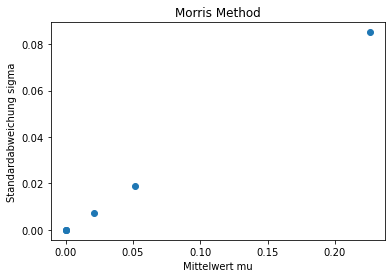

In [7]:
# [3] hier Code eingeben
import matplotlib.pyplot as plt

plt.scatter(Si['mu_star'], Si['sigma'])
plt.xlabel('Mittelwert mu')
plt.ylabel('Standardabweichung sigma')
plt.title ('Morris Method')
plt.show()

### 2. Sobol Indizes

Die Algorithmen zur Bestimmung der Sobol Indizes sind in SALib nach dem gleichen Schema implementiert wie die Morris Method. 

Mit `SALib.sample.saltelli.sample()` erfolgt das Generieren der Input-Wertematrix, dann werden mit diesen Matrix die Modelloutputs bestimmt, und mit `SALib.analyze.sobol.analyze()` erfolgt die Bestimmung der Indizes. 

Als Input Dictionary könnt Ihr das gleiche wie oben nehmen, daneben muss bei `SALib.sample.saltelli.sample()` nur die Anzahl der gewünschten Samples "N" angegeben werden. Als Inputs für `sobol.analyze()` sind das Eingangs-Dictionary, sowie die Modell-Ouputs erforderlich. Mit "print_to_console=True" könnt Ihr Euch die Indizes wieder direkt ausgeben lassen. 

Schaut Euch die Werte an, und vergleicht sie mit den Ergebnissen der Morris Method und Contribution-to-Variance Analyse. 

In [8]:
# [4] hier Code eingeben
from SALib.sample.saltelli import sample
from SALib.analyze.sobol import analyze

# generating inputs
X_Sobol = sample(problem, 1000)

# passing inputs through model
n = len(X_Sobol)
kf_Sobol =np.zeros(n)
lambda_rate_Sobol = np.zeros(n)

for i in range(n):
    kf_Sobol[i] = (X_Sobol[i, 2]*X_Sobol[i, 3])/(X_Sobol[i, 4]*X_Sobol[i, 5])
    lambda_rate_Sobol[i] = -(X_Sobol[i, 0]*kf_Sobol[i]*X_Sobol[i, 5])/(X_Sobol[i, 1]*X_Sobol[i, 2]*X_Sobol[i, 3])

Y_Sobol = lambda_rate_Sobol*3600*24*365 # to get values as [1/a]
Sobol = analyze(problem, Y_Sobol, print_to_console=True)

Group S1 S1_conf ST ST_conf
deltaC 0.043346 0.017673 0.047434 0.004864
epsilon 0.974278 0.078491 0.972001 0.060295
s 0.000000 0.000000 0.000000 0.000000
neff -0.000000 0.000000 0.000000 0.000000
t 0.006188 0.007744 0.007926 0.000692
grad -0.000000 0.000000 0.000000 0.000000

Group_1 Group_2 S2 S2_conf
deltaC epsilon 0.002295 0.039642
deltaC s 0.004978 0.027960
deltaC neff 0.004978 0.027960
deltaC t 0.005016 0.028457
deltaC grad 0.004978 0.027960
epsilon s -0.008404 0.100332
epsilon neff -0.008404 0.100332
epsilon t -0.007518 0.101173
epsilon grad -0.008404 0.100332
s neff -0.000000 0.000000
s t -0.000000 0.000000
s grad -0.000000 0.000000
neff t 0.000000 0.000000
neff grad 0.000000 0.000000
t grad 0.001201 0.010578


Um die Werte der Efekte Erster Ordnung und der Totalen Effekte zu vergleichen, visualisiert diese beiden in einer Graphik. Vergleicht dabei die verschiedenen Effekte in Bezug auf die einzelnen Parameter und interpretiert diese. 

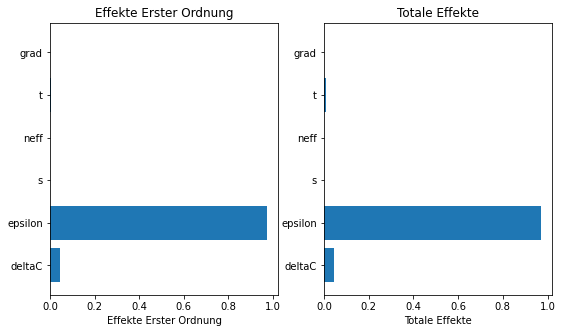

In [9]:
# [5] hier Code eingeben
import matplotlib.pyplot as plt

labels = ['deltaC', 'epsilon', 's', 'neff', 't', 'grad']

fig = plt.figure(1, figsize=(9, 5))

ax = fig.add_subplot(1,2,1)
plt.barh(labels, width=Sobol['S1'])
plt.xlabel('Effekte Erster Ordnung')
plt.title ('Effekte Erster Ordnung')

ax1 = fig.add_subplot(1,2,2)
plt.barh(labels, width=Sobol['ST'])
plt.xlabel('Totale Effekte')
plt.title ('Totale Effekte')
plt.show()

## Ende

### Referenzen: 

Würth et al. (2021): Quantifying biodegradation rate constants of o-xylene by combining compound-specific isotope analysis and groundwater dating. Journal of Contaminant Hydrology, 238, 103757